In [155]:
"""
Author: Madison Sanchez-Forman
Version: 11.16.24
Description: This script performs PCA analysis to compare each player by year from our dataset
"""
#******* Import Statements ******#
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#******* Local Variables ******#
write_csv, show_graphs = False, True #switch to true if you want to save outputs as new files, other controls if graphs are printed after PCA
df_path = "WNBA - Players - General.csv" #path to orginal dataframe

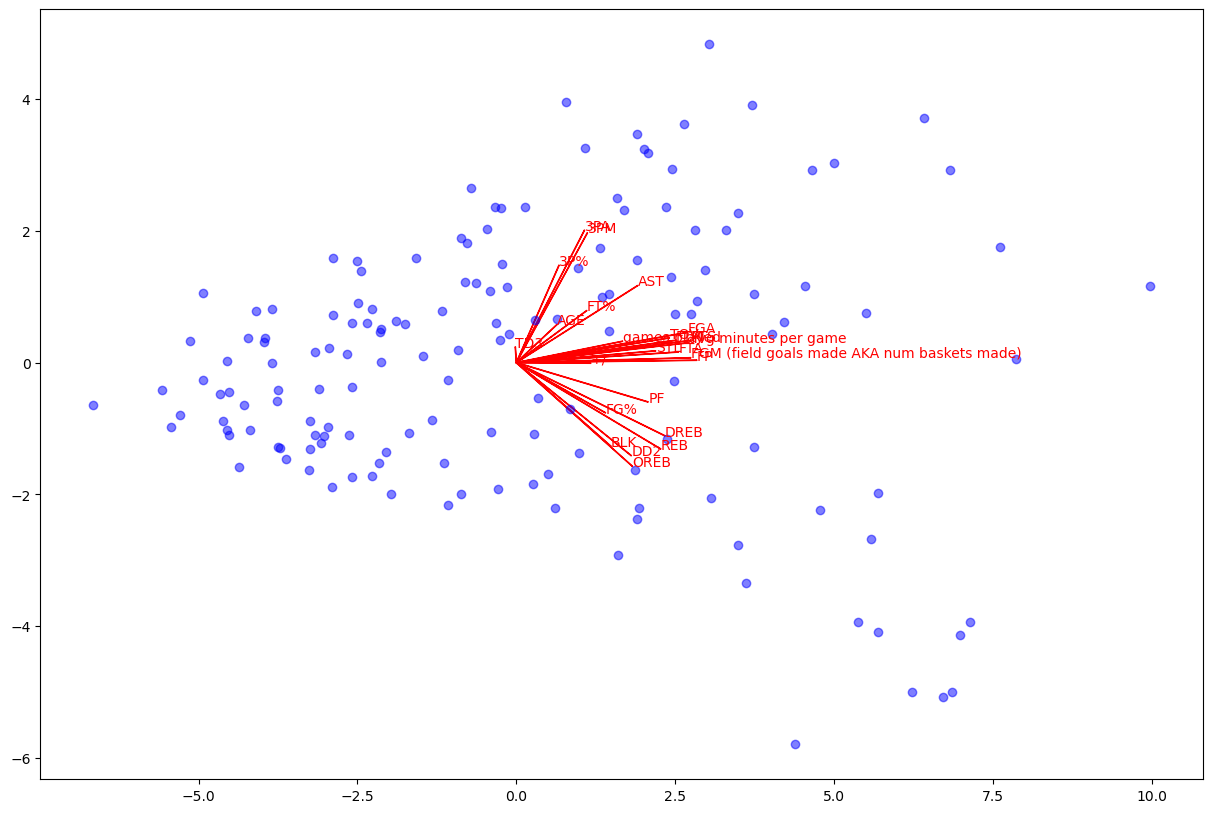

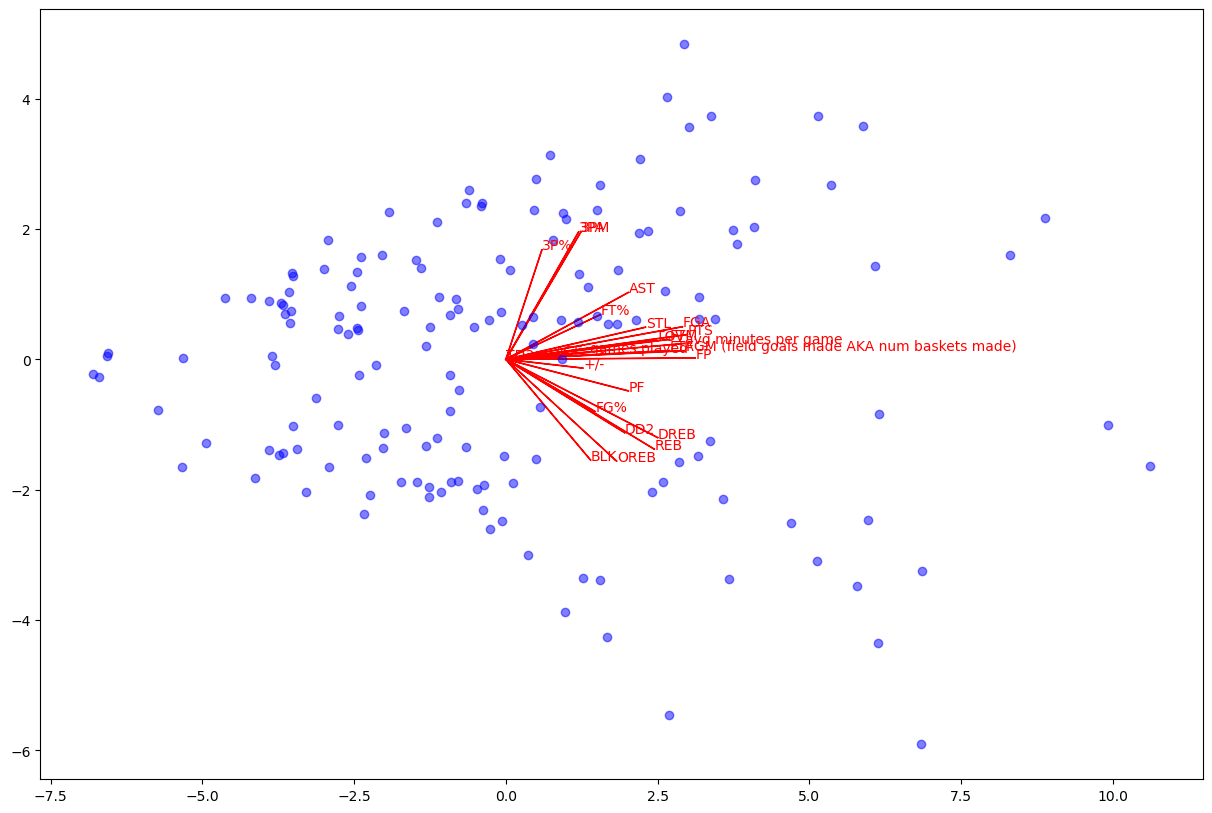

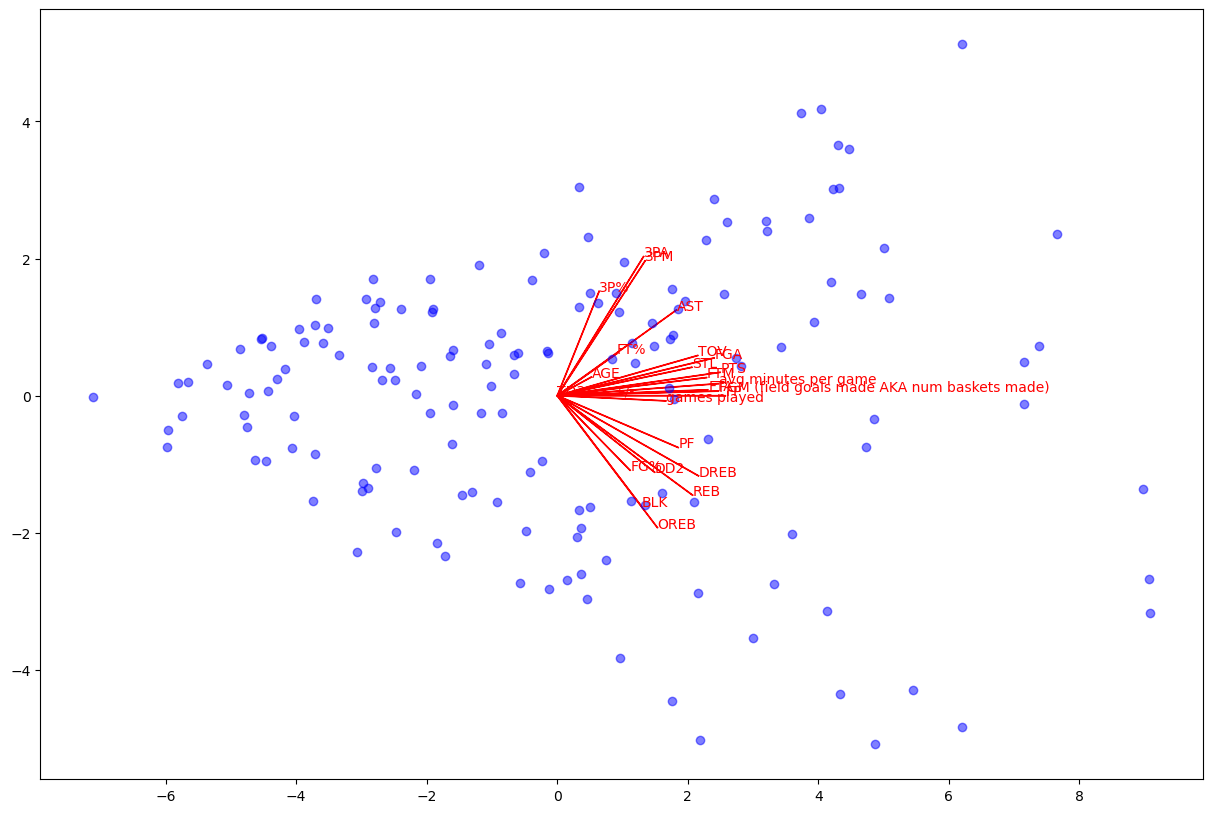

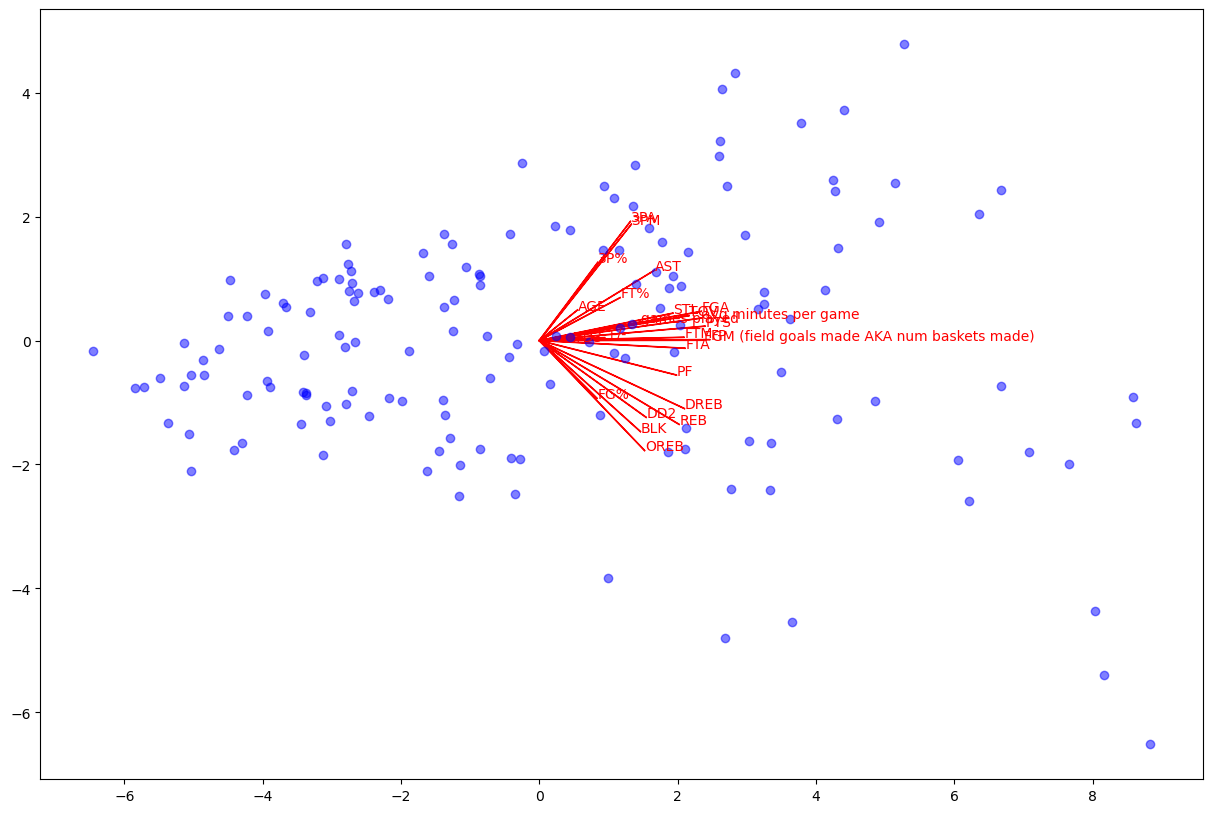

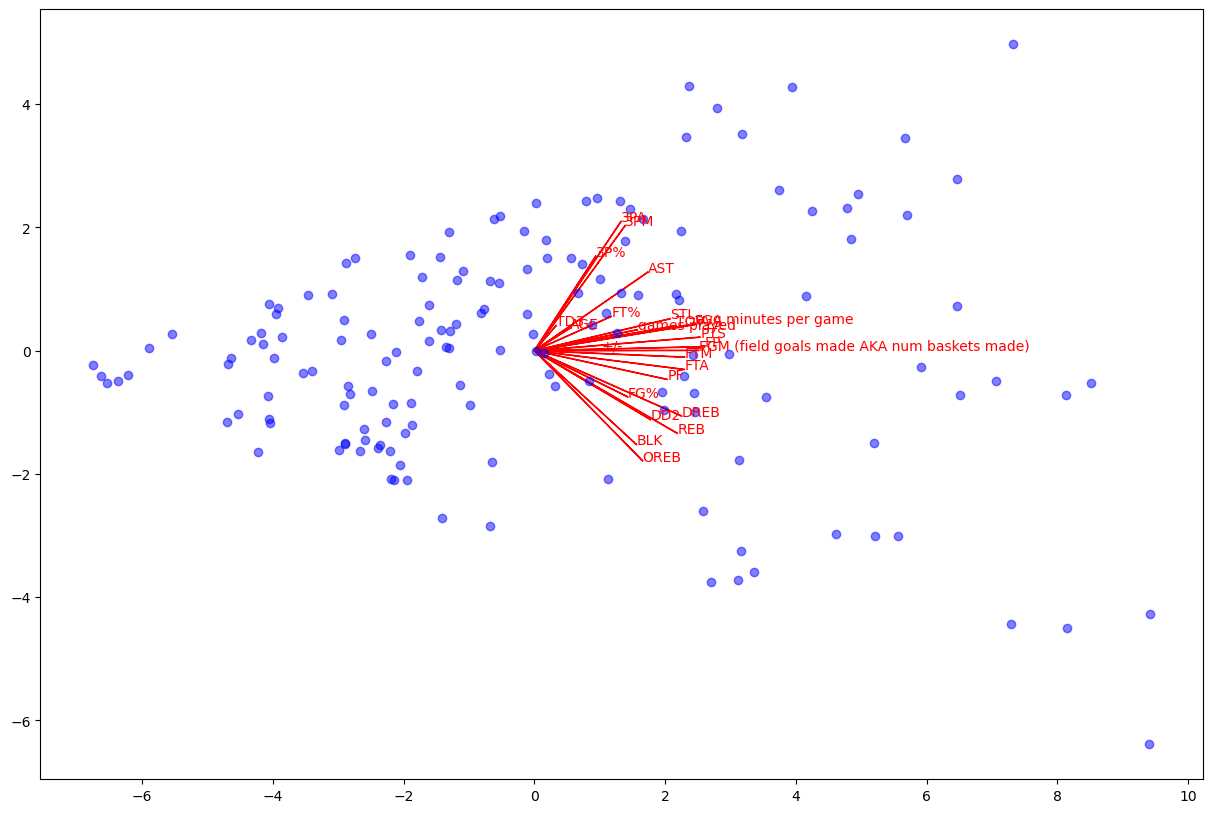

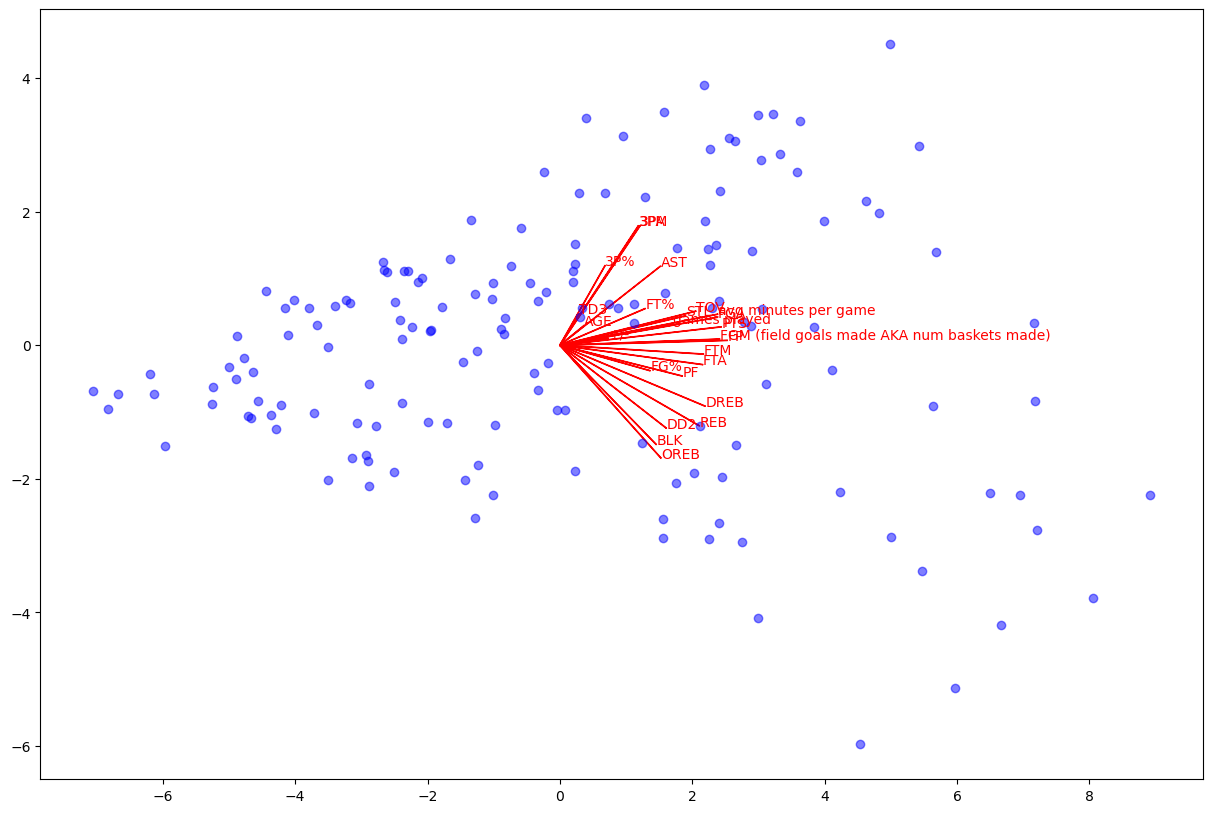

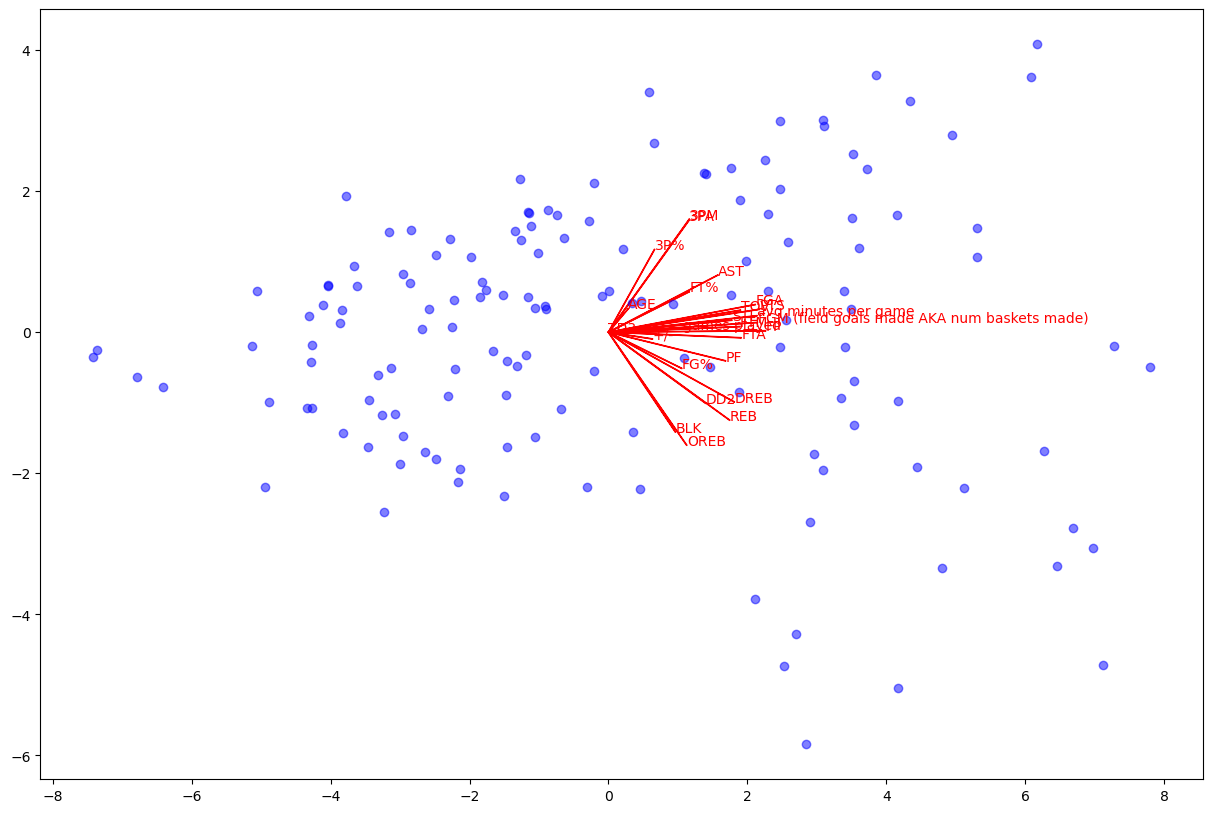

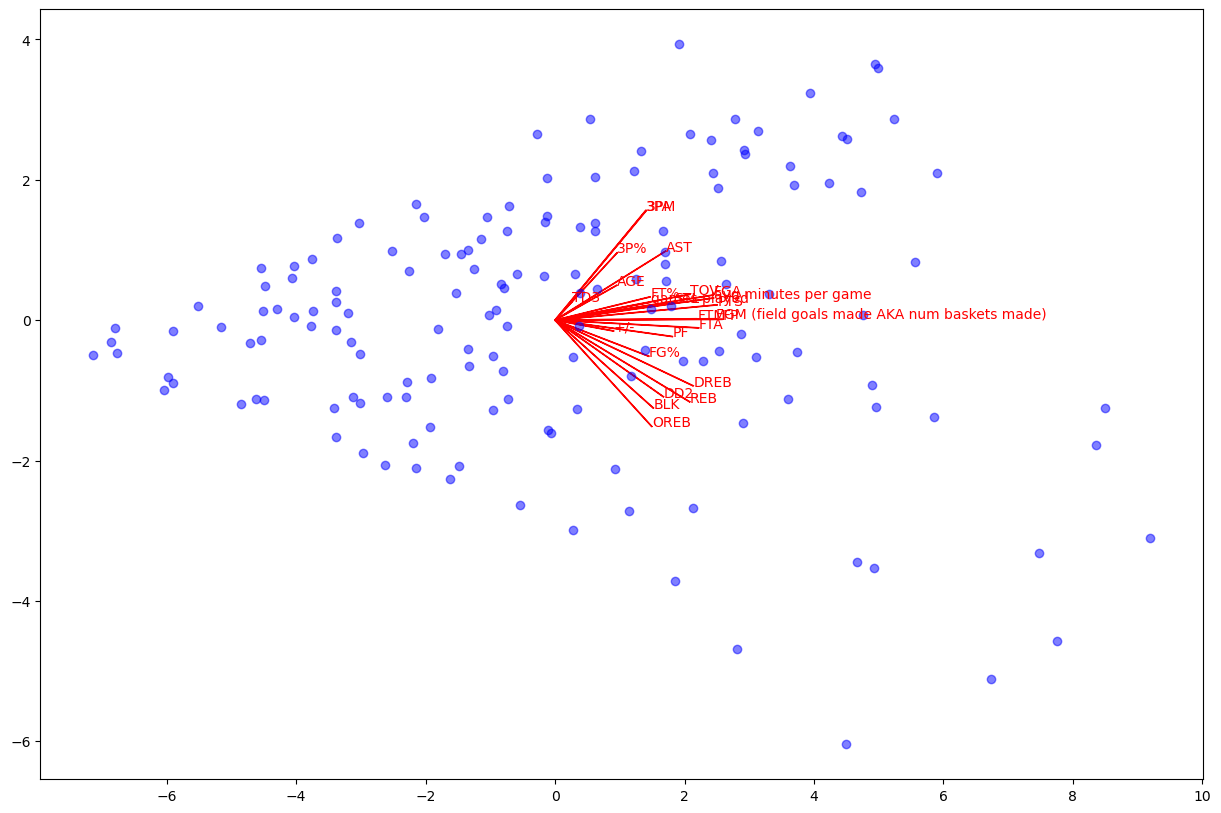

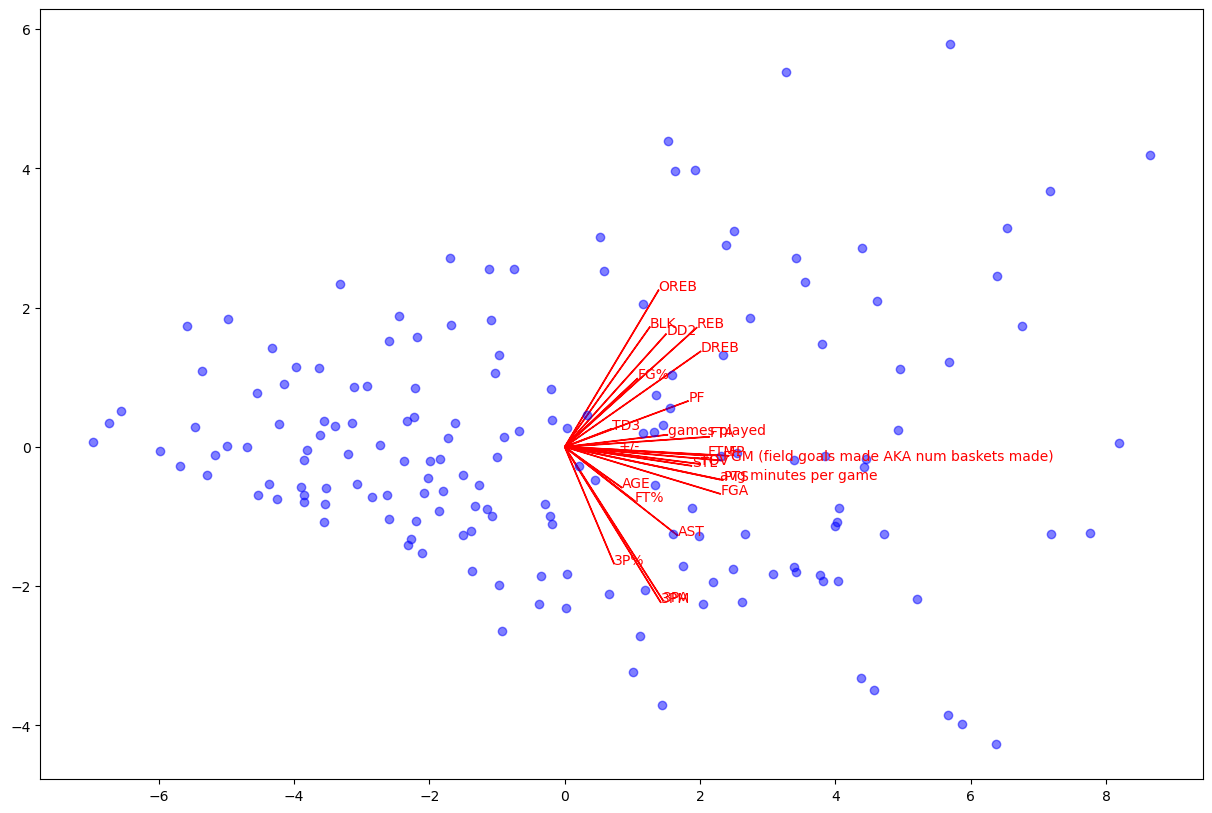

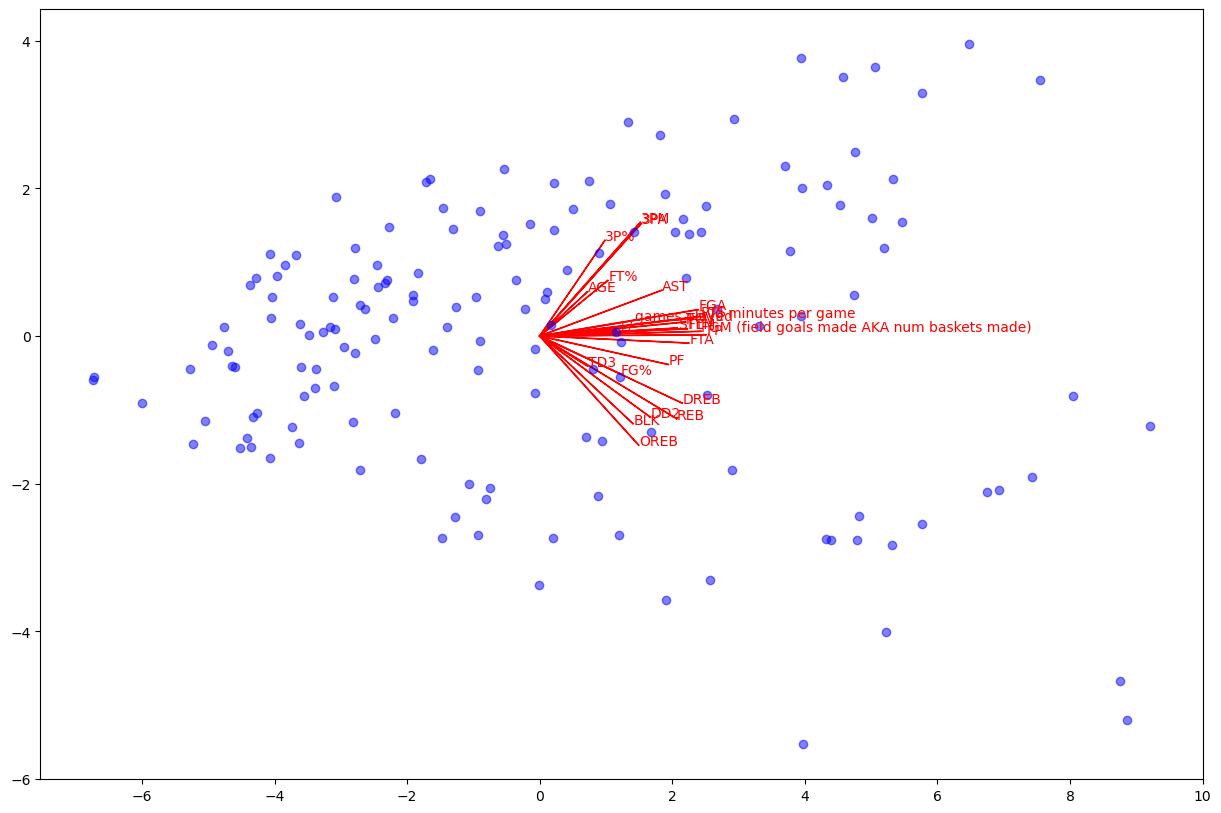

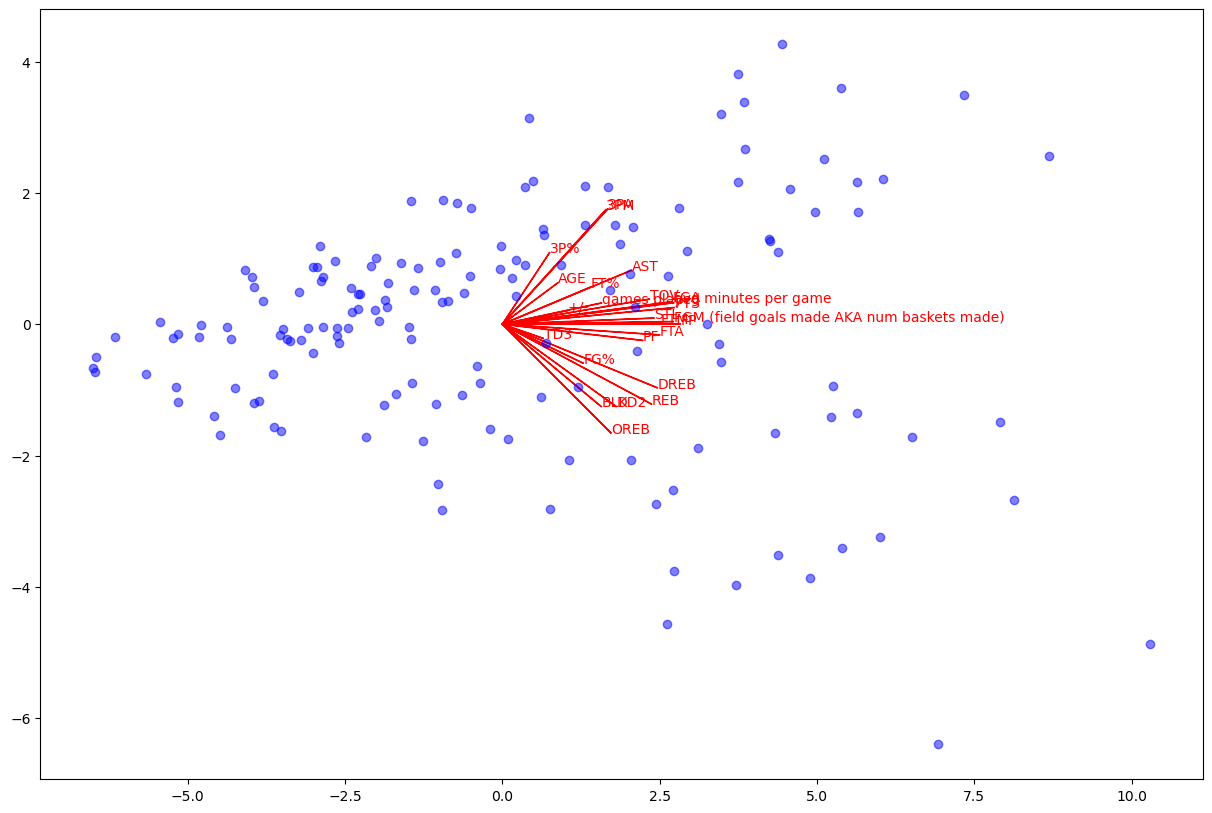

In [156]:
#******* Function Definitions ******#
def pca_per_year(year, df, show_graphs):
    """
    Perfoms PCA analysis using Sklearn's PCA class. 
    Params:
        year: (int) chosen year  
        df: (DataFrame) loaded df from main 
        show_graphs: (boolean) T/F to show per year graph
    Returns:
        pca_out: shows how each player's compared to other players
        pca_components: shows how influential each individual feature was in contributing to the overall variance
    """
    pca_df = df[df['Year'] == year]
    names = pca_df['PLAYER'] #storing names for final output df
    pca_df = pca_df.drop(['PLAYER', 'TEAM', 'Year', 'Unnamed: 0', 'W', 'L'], axis=1) #HAVE TO DROP NOMINAL COLUMNS FROM DF

    n = len(pca_df.columns) #number of principal components = number of original features
    dat = StandardScaler().fit_transform(pca_df) 
    pca = PCA(n_components=n) #performing pca 
    pca.fit(dat) 

    x_vector, y_vector = pca.components_[0], pca.components_[1] #x, y are vectors of first two principal components
    xs, ys = pca.transform(dat)[:, 0], pca.transform(dat)[:, 1]

    if show_graphs: #for visualizing, just plotting principal vectors and players on graph
        plt.figure(figsize=(15,10))
        for i in range(len(x_vector)):
            plt.arrow(0, 0,
                    x_vector[i] * max(xs),
                    y_vector[i] * max(ys),
                    color='r',
                    width=0.005,
                    head_width=0.0025)
            plt.text(x_vector[i] * max(xs) * 1,
                    y_vector[i] * max(ys) * 1,
                    list(pca_df.columns.values)[i],
                    color='r')
            
        for i in range(len(xs)):
            plt.plot(xs[i],
                    ys[i],
                    'bo',
                    alpha=0.5)
        plt.show()

    pca_out = pd.DataFrame({'Player': names,'Component 1': xs, 'Component 2' :ys}) #output player principal components
    pca_components = pd.DataFrame({'Variables':pca_df.columns.values,'Loadings X': x_vector, 'Loadings Y': y_vector}) #output loadings per feature 
    return pca_out, pca_components

def main():
    """
    Main function
    NOTE: if you want to run this code and save the outputs to your local machine, you have to change the paths in the if statement
    """
    player_data = pd.read_csv(df_path)
    for i in range(2014, 2025): #loop over all of our years
        pca_out, principal_components = pca_per_year(i, player_data, show_graphs)
        if write_csv:
            pca_out.to_csv(f"/Users/madiforman/Desktop/WNBA/pca_out/PCA_out{i}.csv") #write out results
            principal_components.to_csv(f"/Users/madiforman/Desktop/WNBA/loadings/principal_component_loadings{i}.csv")
main()